In [189]:
# 对于SVM，存在一个分类面，两个点集到此平面的最小距离最大，两个点集中的边缘点到此平面的距离最大。

import numpy as np
from matplotlib import colors
from sklearn import svm 
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl



In [190]:
# *************将字符串转为整型，便于数据加载***********************
# 在函数中建立一个对应字典就可以了，输入字符串，输出字符串对应的数字。
def rock_type(s):
    #     print(type(s))
    # 字符串加个b是指btypes 字节串类型
    it = {b'circle': 0, b'square': 1}
    return it[s]


# 加载数据
data_path = '../dataset/train1/train1.txt'  # 数据文件的路径
data = np.loadtxt(data_path,  # 数据文件路径
                  dtype=float,  # 数据类型
                  delimiter=',',  # 数据分隔符
                  converters={2: rock_type})  # 将第5列使用函数iris_type进行转换
# print(data)                                                 #data为二维数组，data.shape=(150, 5)
# print(data.shape)
# 数据分割
x, y = np.split(data,  # 要切分的数组
                (2,),  # 沿轴切分的位置，第3列开始往后为y
                axis=1)  # 1代表纵向分割，按列分割

x = x[:, 0:2]
# 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
# 在X中我们取前两列作为特征，为了后面的可视化，原始的四维不好画图。x[:,0:4]代表第一维(行)全取，第二维(列)取0~2
# print(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,  # 所要划分的样本特征集
    y,  # 所要划分的样本结果
    random_state=1,  # 随机数种子确保产生的随机数组相同
    test_size=0.3)  # 测试样本占比
print(x_train)
print(y_train)



[[ 0.38056606 -0.43536758]
 [ 0.35620984 -0.42318946]
 [ 1.34872615 -1.4583292 ]
 ...
 [ 1.40961671 -1.15692079]
 [ 2.07941294 -1.924142  ]
 [ 0.3957887  -0.41101134]]
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [191]:
# create model
# **********************SVM分类器构建*************************
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,  # 误差项惩罚系数,默认值是1
                  kernel='linear',  # 线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr')  # 决策函数
    return clf


# 2.定义模型：SVM模型定义
clf = classifier()


In [192]:
y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
print(x_train.ravel())

[ 0.38056606 -0.43536758  0.35620984 ... -1.924142    0.3957887
 -0.41101134]


In [193]:
# 模型训练

# y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
# ***********************训练模型*****************************


def train(clf, x_train, y_train):
    clf.fit(x_train,  # 训练集特征向量，fit表示输入数据开始拟合
            y_train.ravel())  # 训练集目标值 ravel()扁平化，将原来的二维数组转换为一维数组


# 3.训练SVM模型
train(clf, x_train, y_train)


In [194]:
# **************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    # 分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' % (clf.score(x_train, y_train)))
    print('test data prediction:%.3f' % (clf.score(x_test, y_test)))
    # 原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    # 计算决策函数的值，表示x到各分割平面的距离,3类，所以有3个决策函数，不同的多类情况有不同的决策函数？
    print('decision_function:\n', clf.decision_function(x_train))


# 4.模型评估
print_accuracy(clf, x_train, y_train, x_test, y_test)


trianing prediction:1.000
test data prediction:1.000
traing data Accuracy:1.000
testing data Accuracy:1.000
decision_function:
 [ 2.84146373  2.92725497 -2.02964213 ... -1.34446726 -4.87575095
  2.87450805]


In [195]:
print(x[:, 0])
print(x_test.shape)

[1.38526046 1.21476686 2.05201221 ... 0.77635473 0.38969964 0.37143248]
(9760, 2)


In [196]:
# 取样，取10%，不然数据太多了看不清
# https://blog.csdn.net/weixin_42201701/article/details/86655721

row_rand_array1 = np.arange(x.shape[0])

np.random.shuffle(row_rand_array1)

x_plot = x[row_rand_array1[0:300]]

row_rand_array = np.arange(x_test.shape[0])

np.random.shuffle(row_rand_array)

x_test_plot = x_test[row_rand_array[0:300]]

y_plot = np.random.choice(y.flatten(), size=300)

"""
row_rand:
array([[12, 13, 14, 15, 16, 17],
       [ 0,  1,  2,  3,  4,  5]])
"""
print(x_plot.shape)
print(x_test_plot.shape)
print(y_plot.shape)


(300, 2)
(300, 2)
(300,)


grid_test:
 [[ 0.29531929 -1.93936467]
 [ 0.29531929 -1.93079715]
 [ 0.29531929 -1.92222964]
 ...
 [ 2.09768033 -0.25156372]
 [ 2.09768033 -0.24299621]
 [ 2.09768033 -0.23442869]]
(40000, 2)
the distance to decision plane:
 [-1.05114378 -1.02791731 -1.00469083 ... -0.38098633 -0.35775985
 -0.33453338]
grid_hat:
 [0. 0. 0. ... 0. 0. 0.]


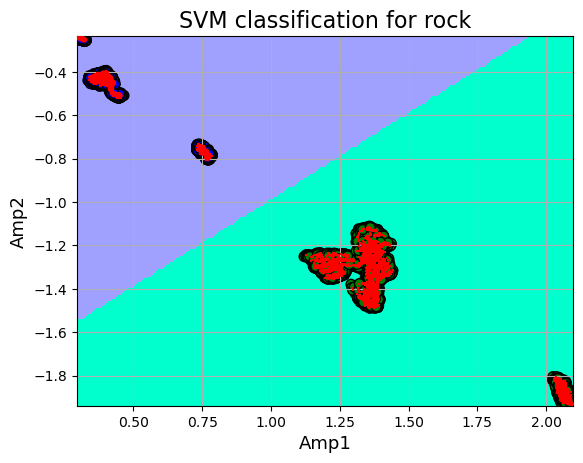

In [197]:
# 可视化及使用
# 所有数据
def draw(clf, x):
    # 标记特征值
    iris_feature = u'Amp1', u'Amp2'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(
        y), edgecolor='k', s=50, cmap=cm_dark)  # 样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=2,
                facecolor='red', zorder=10, marker='+')       # 测试点

  
    # 设置坐标标签及字体大小
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)


grid_test:
 [[ 0.29531929 -1.93936467]
 [ 0.29531929 -1.93079715]
 [ 0.29531929 -1.92222964]
 ...
 [ 2.09768033 -0.25156372]
 [ 2.09768033 -0.24299621]
 [ 2.09768033 -0.23442869]]
(40000, 2)
the distance to decision plane:
 [-1.05114378 -1.02791731 -1.00469083 ... -0.38098633 -0.35775985
 -0.33453338]
grid_hat:
 [0. 0. 0. ... 0. 0. 0.]


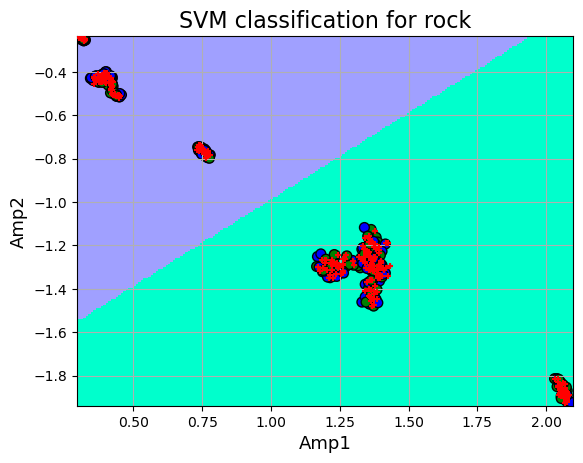

In [198]:
# 可视化及使用
# 10%数据
def draw(clf, x):
    # 标记特征值
    iris_feature = u'Amp1', u'Amp2'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据

    # 取样，取10%，不然数据太多了看不清

    # print(y_plot)

    plt.scatter(x_plot[:, 0], x_plot[:, 1], c=np.squeeze(
        y_plot), edgecolor='k', s=50, cmap=cm_dark)  # 样本点
    plt.scatter(x_test_plot[:, 0], x_test_plot[:, 1], s=20,
                facecolor='red', zorder=10, marker='+')       # 测试点

    # 设置坐标标签及字体大小
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)
